# PROYECTO NO.1 
## Angel Chamo 


## 1. Paquetes y datos
Seleccionamos las librerias necesarias para realizar el proyecto 

In [1]:
# librerias para el proyecto
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importamos los datos de la carpeta que se proporciono en las instrucciones. https://drive.google.com/file/d/1Y5vA7xxk68rjhon6_SJCIqhDn2mIyBZU/view 

In [2]:
data = np.load('proyecto_data/proyecto_training_data.npy')
print(data)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


Analizamos los datos 

In [3]:
# dimension 
print(data.shape)
# tipo
print(data.dtype)
# tamaño 
print(data.size)

(1460, 6)
float64
8760


## 2. Slicing
Realizamos el Slicing en el dataset, 80% del data set para entrenamiento y el 20% para confirmar los modelos. Primero debemos saber cual es el numero de filas en el dataset para realizar el slicing solicitado.

In [4]:
num_filas = data.shape[0]
print(num_filas)

1460


Teniendo en cuenta el numero de filas procedemos a realizar el slicing para el entrenamiento y validacion, seleccionando aleatoriamente el 80% de entrenamiento y 20% de validacion.

In [5]:
# seleccionamos aleatoriamente 80% de las filas del data set 
filas_training = np.random.choice(num_filas, size =int(num_filas * 0.8), replace = False)
# usamos las filas seleccionadas aleatoriamente para el dataset de entrenamiento
data_training = data[filas_training, :]
# seleccionamos las filas restantes para la validacion 
filas_validation = np.setdiff1d(np.arange(num_filas), filas_training)
# usamos las filas restantes para el dataset de validacion
data_validation = data[filas_validation,:]

## 3. Analisis exploratorio de datos
### MEDIA

In [6]:
media_SalePrice =    np.mean(data[:,0], axis=0)
media_OverallQual =  np.mean(data[:,1], axis=0)
media_1stFlrSF =     np.mean(data[:,2], axis=0)
media_TotRmsAbvGrd = np.mean(data[:,3], axis=0)
media_YearBuilt =    np.mean(data[:,4], axis=0)
media_LotFrontage =  np.nanmean(data[:,5], axis=0)

print("Media de Saleprice:", media_SalePrice)
print("Media de OverallQual:", media_OverallQual)
print("Media de 1stFlrSF:", media_1stFlrSF)
print("Media de TotRmsAbvGrd:", media_TotRmsAbvGrd)
print("Media de YearBuilt:", media_YearBuilt)
print("Media de LotFrontage:", media_LotFrontage)

Media de Saleprice: 180921.19589041095
Media de OverallQual: 6.0993150684931505
Media de 1stFlrSF: 1162.626712328767
Media de TotRmsAbvGrd: 6.517808219178082
Media de YearBuilt: 1971.267808219178
Media de LotFrontage: 70.04995836802665


## VALOR MAXIMO

In [7]:
max_SalePrice =    np.max(data[:,0],axis=0)
max_OverallQual =  np.max(data[:,1],axis=0)
max_1stFlrSF =     np.max(data[:,2],axis=0)
max_TotRmsAbvGrd = np.max(data[:,3],axis=0)
max_YearBuilt =    np.max(data[:,4],axis=0)
max_LotFrontage =  np.nanmax(data[:,5],axis=0)

print("Valor maximo de Saleprice:",    max_SalePrice)
print("Valor maximo de OverallQual:",  max_OverallQual)
print("Valor maximo de 1stFlrSF:",     max_1stFlrSF)
print("Valor maximo de TotRmsAbvGrd:", max_TotRmsAbvGrd)
print("Valor maximo de YearBuilt:",    max_YearBuilt)
print("Valor maximo de LotFrontage:",  max_LotFrontage)

Valor maximo de Saleprice: 755000.0
Valor maximo de OverallQual: 10.0
Valor maximo de 1stFlrSF: 4692.0
Valor maximo de TotRmsAbvGrd: 14.0
Valor maximo de YearBuilt: 2010.0
Valor maximo de LotFrontage: 313.0


## VALOR MINIMO

In [8]:
min_SalePrice =    np.min(data[:,0],axis=0)
min_OverallQual =  np.min(data[:,1],axis=0)
min_1stFlrSF =     np.min(data[:,2],axis=0)
min_TotRmsAbvGrd = np.min(data[:,3],axis=0)
min_YearBuilt =    np.min(data[:,4],axis=0)
min_LotFrontage =  np.nanmin(data[:,5],axis=0)

print("Valor minimo de Saleprice:",    min_SalePrice)
print("Valor minimo de OverallQual:",  min_OverallQual)
print("Valor minimo de 1stFlrSF:",     min_1stFlrSF)
print("Valor minimo de TotRmsAbvGrd:", min_TotRmsAbvGrd)
print("Valor minimo de YearBuilt:",    min_YearBuilt)
print("Valor minimo de LotFrontage:",  min_LotFrontage)

Valor minimo de Saleprice: 34900.0
Valor minimo de OverallQual: 1.0
Valor minimo de 1stFlrSF: 334.0
Valor minimo de TotRmsAbvGrd: 2.0
Valor minimo de YearBuilt: 1872.0
Valor minimo de LotFrontage: 21.0


## Rango

In [9]:
rango_SalePrice =    np.ptp(data[:,0])
rango_OverallQual =  np.ptp(data[:,1])
rango_1stFlrSF =     np.ptp(data[:,2])
rango_TotRmsAbvGrd = np.ptp(data[:,3])
rango_YearBuilt =    np.ptp(data[:,4])
rango_LotFrontage =  max_LotFrontage - min_LotFrontage 

print("Rango Peak to Peak de Saleprice:",    rango_SalePrice)
print("Rango Peak to Peak de OverallQual:",  rango_OverallQual)
print("Rango Peak to Peak de 1stFlrSF:",     rango_1stFlrSF)
print("Rango Peak to Peak de TotRmsAbvGrd:", rango_TotRmsAbvGrd)
print("Rango Peak to Peak de YearBuilt:",    rango_YearBuilt)
print("Rango Peak to Peak de LotFrontage:",  rango_LotFrontage)

Rango Peak to Peak de Saleprice: 720100.0
Rango Peak to Peak de OverallQual: 9.0
Rango Peak to Peak de 1stFlrSF: 4358.0
Rango Peak to Peak de TotRmsAbvGrd: 12.0
Rango Peak to Peak de YearBuilt: 138.0
Rango Peak to Peak de LotFrontage: 292.0


## Desviasion Estandar

In [10]:
dst_SalePrice =    np.std(data[:,0], axis=0)
dst_OverallQual =  np.std(data[:,1], axis=0)
dst_1stFlrSF =     np.std(data[:,2], axis=0)
dst_TotRmsAbvGrd = np.std(data[:,3], axis=0)
dst_YearBuilt =    np.std(data[:,4], axis=0)
dst_LotFrontage =  np.nanstd(data[:,5], axis=0)

print("La desviasion estandar de Saleprice:",    dst_SalePrice)
print("La desviasion estandar de OverallQual:",  dst_OverallQual)
print("La desviasion estandar de 1stFlrSF:",     dst_1stFlrSF)
print("La desviasion estandar de TotRmsAbvGrd:", dst_TotRmsAbvGrd)
print("La desviasion estandar de YearBuilt:",    dst_YearBuilt)
print("La desviasion estandar de LotFrontage:",  dst_LotFrontage)

La desviasion estandar de Saleprice: 79415.29188606751
La desviasion estandar de OverallQual: 1.3825228366585953
La desviasion estandar de 1stFlrSF: 386.45532230228963
La desviasion estandar de TotRmsAbvGrd: 1.624836553698191
La desviasion estandar de YearBuilt: 30.192558810489448
La desviasion estandar de LotFrontage: 24.27463944767604


## 4. Estadística descriptiva

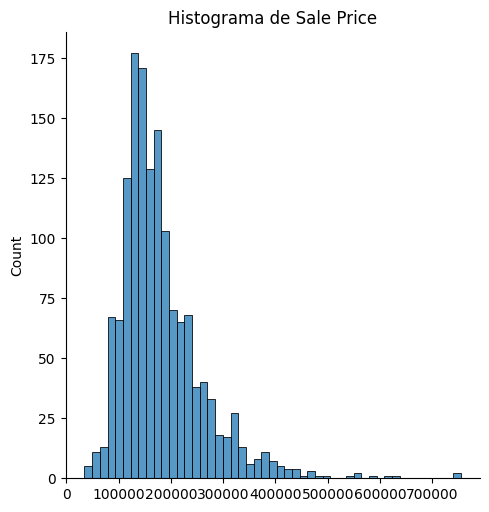

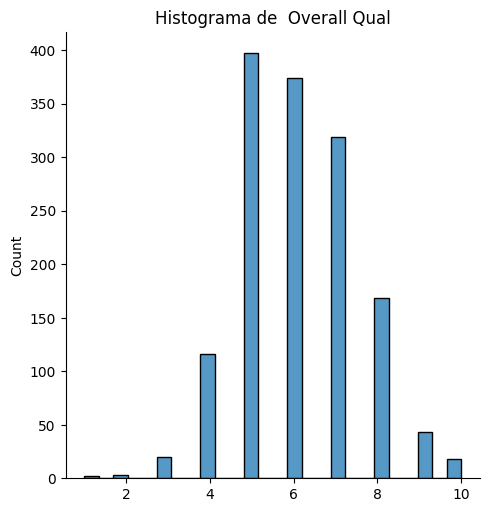

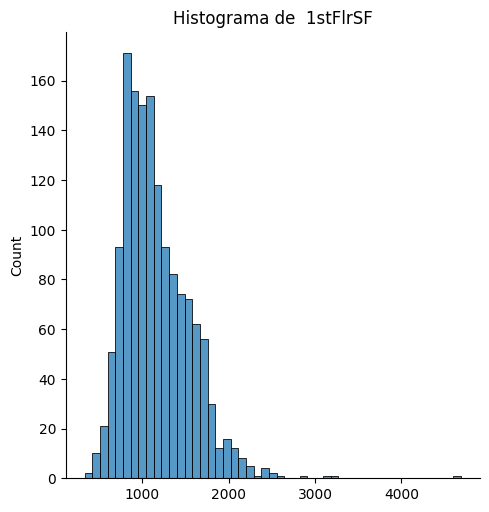

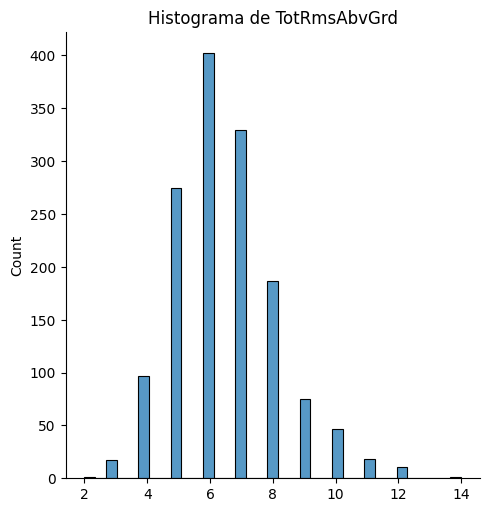

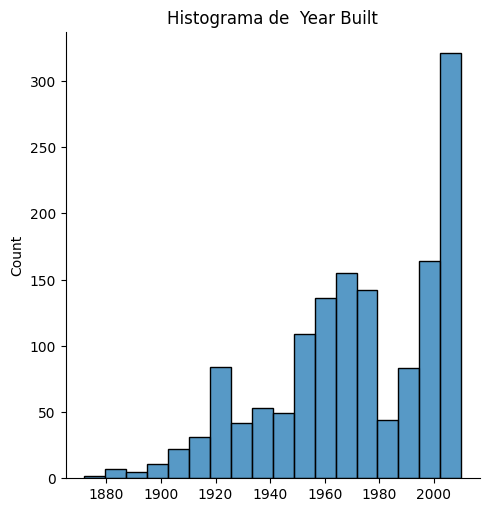

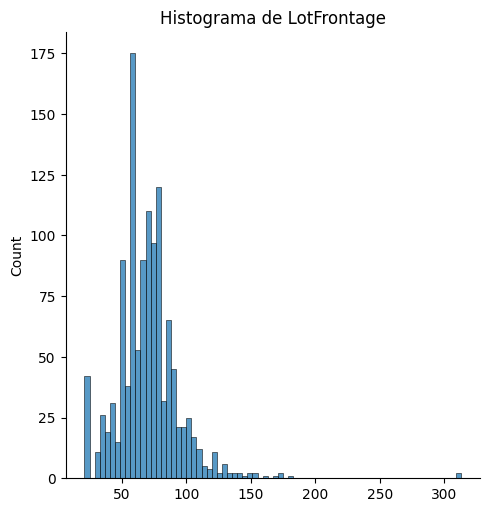

In [11]:
sns.displot(data[:,0])
plt.title("Histograma de Sale Price")
plt.show()

sns.displot(data[:,1])
plt.title("Histograma de  Overall Qual")
plt.show()

sns.displot(data[:,2])
plt.title("Histograma de  1stFlrSF")
plt.show()

sns.displot(data[:,3])
plt.title("Histograma de TotRmsAbvGrd")
plt.show()

sns.displot(data[:,4])
plt.title("Histograma de  Year Built")
plt.show()

sns.displot(data[:,5])
plt.title("Histograma de LotFrontage")
plt.show()

## Analisis variable independiente
Como variable dependiente se utilizara el precio de las casas, de esta manera analizar cuales son los factores de los precios de las casas y como impactan en el precio. Por lo tanto, las variables independientes seran: Over all Qual, First floor square feet, total rooms, construction date y linear feet of street connected to property. 

### Over All Quality vrs. Sale Price

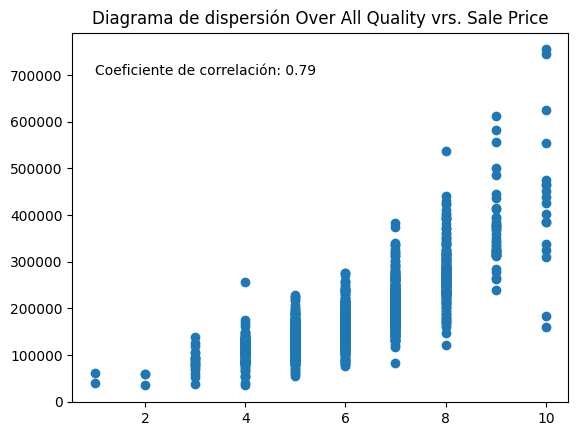

In [12]:
# Se calcula el coeficiente de correlación
corr_coef = np.corrcoef(data[:,1],data[:,0])[0, 1]
# Se crea el diagrama de dispersión
plt.scatter(data[:,1],data[:,0])
# Se agrega el coeficiente de correlación en el gráfico
plt.text(1, 700000, f'Coeficiente de correlación: {corr_coef:.2f}')
# Se agrega un título al diagrama
plt.title('Diagrama de dispersión Over All Quality vrs. Sale Price')
plt.show()

### First floor square feet vrs. Sale Price

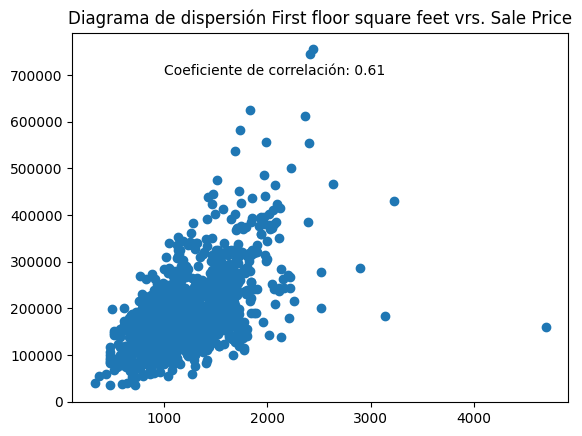

In [13]:
# Se calcula el coeficiente de correlación
corr_coef = np.corrcoef(data[:,2],data[:,0])[0, 1]
# Se crea el diagrama de dispersión
plt.scatter(data[:,2],data[:,0])
# Se agrega el coeficiente de correlación en el gráfico
plt.text(1000, 700000, f'Coeficiente de correlación: {corr_coef:.2f}')
# Se agrega un título al diagrama
plt.title('Diagrama de dispersión First floor square feet vrs. Sale Price')
plt.show()

### total rooms vrs. Sale Price

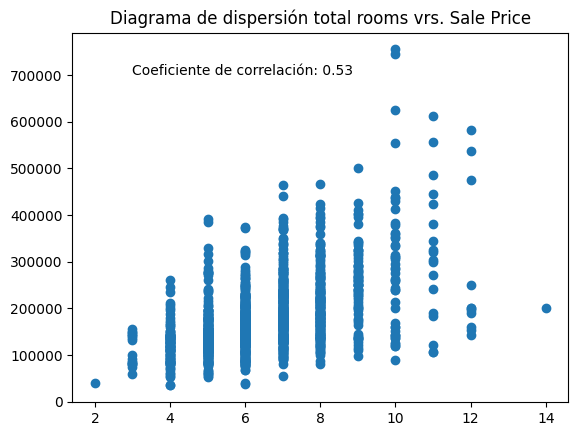

In [14]:
# Se calcula el coeficiente de correlación
corr_coef = np.corrcoef(data[:,3],data[:,0])[0, 1]
# Se crea el diagrama de dispersión
plt.scatter(data[:,3],data[:,0])
# Se agrega el coeficiente de correlación en el gráfico
plt.text(3, 700000, f'Coeficiente de correlación: {corr_coef:.2f}')
# Se agrega un título al diagrama
plt.title('Diagrama de dispersión total rooms vrs. Sale Price')
plt.show()

### construction date vrs. Sale price

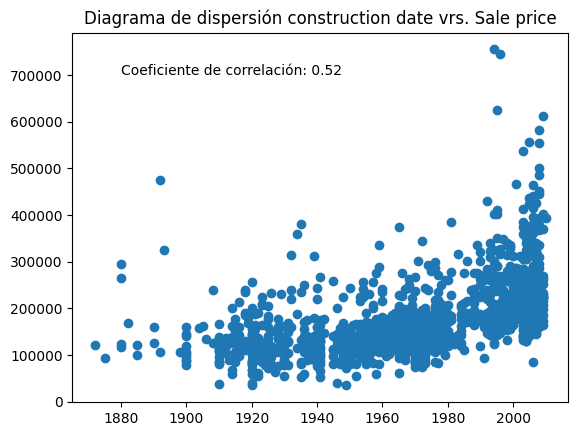

In [15]:
# Se calcula el coeficiente de correlación
corr_coef = np.corrcoef(data[:,4],data[:,0])[0, 1]
# Se crea el diagrama de dispersión
plt.scatter(data[:,4],data[:,0])
# Se agrega el coeficiente de correlación en el gráfico
plt.text(1880, 700000, f'Coeficiente de correlación: {corr_coef:.2f}')
# Se agrega un título al diagrama
plt.title('Diagrama de dispersión construction date vrs. Sale price')
plt.show()

### linear feet of street connected to propertyvrs. Sale price

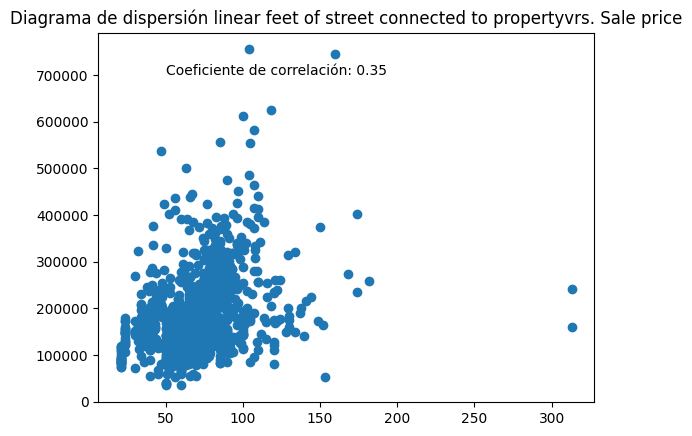

In [16]:
# Como la variable linear feet of street tiene Nan's es necesario eliminarlos 
x = data[:,5]
y = data[:,0]
no_nan_indices = ~np.isnan(x)
# Filtrar ambas variables para eliminar los valores NaN en x
x_no_nan = np.array(x)[no_nan_indices]
y_no_nan = np.array(y)[no_nan_indices]
# Calcular el coeficiente de correlación entre x_no_nan e y_no_nan
corr = np.corrcoef(x_no_nan, y_no_nan)[0, 1]
# Se crea el diagrama de dispersión
plt.scatter(x,y)
# Se agrega el coeficiente de correlación en el gráfico
plt.text(50, 700000, f'Coeficiente de correlación: {corr:.2f}')
# Se agrega un título al diagrama
plt.title('Diagrama de dispersión linear feet of street connected to propertyvrs. Sale price')
plt.show()

## modelo de regresión lineal

In [78]:
class LinearRegression:
    def __init__(self, epochs, imprimir_error_cada, alpha):
        self.epochs = epochs
        self.imprimir_error_cada = imprimir_error_cada
        self.alpha = alpha
        self.theta = None
        self.errors = []
        self.models = []
        
    def train(self, X, y):
        n = len(X)
        X = np.c_[X, np.ones(n)]
        self.theta = np.zeros(2)
        
        for epoch in range(self.epochs):
            y_pred = X.dot(self.theta)
            error = np.nansum((y_pred - y)**2)/(2*n)
            self.errors.append(error)
            
            if epoch % self.imprimir_error_cada == 0:
                print(f"Iteración: {epoch}, Error: {error}")
                
            gradient = (1/n)*X.T.dot(y_pred - y)
            self.theta = self.theta - self.alpha*gradient
            
            if epoch % n == 0:
                self.models.append(self.theta)
            
        self.models.append(self.theta)
    
    def predict(self, X):
        n = len(X)
        X = np.c_[X, np.ones(n)]
        return X.dot(self.theta)
    
    def plot_error(self):
        plt.plot(range(0, self.epochs, self.imprimir_error_cada), self.errors[::self.imprimir_error_cada])
        plt.title("Cambio de error en el tiempo")
        plt.xlabel("Número de iteraciones")
        plt.ylabel("Error")
        plt.show()
    
    def plot_model(self, n):
        if len(self.models) == 0:
            print("Debe entrenar el modelo primero.")
            return
        
        if n > len(self.models):
            print(f"n no puede ser mayor que el número de modelos entrenados ({len(self.models)}).")
            return
        
        for i in range(n, len(self.models), n):
            theta = self.models[i]
            plt.scatter(X, y)
            plt.plot(X, theta[0]*X + theta[1], color="red")
            plt.title(f"Modelo después de {i} iteraciones")
            plt.xlabel("Variable independiente (X)")
            plt.ylabel("Variable dependiente (y)")
            plt.show()
    
    def predict_combined(self, model, X):
        # Predicción del modelo entrenado manualmente
        y_manual = self.predict(X)

        # Predicción del modelo de Scikit-learn
        y_sklearn = model.predict(X.reshape(-1, 1))

        # Combinación de las dos predicciones
        y_combined = (y_manual + y_sklearn) / 2

        return y_manual, y_sklearn, y_combined


y = sale price 

x = over all quality

Iteración: 0, Error: 19579630612.175514
Iteración: 10, Error: 1347801356.8729937
Iteración: 20, Error: 1344871574.4724588
Iteración: 30, Error: 1342568299.9382954
Iteración: 40, Error: 1340286881.4050438
Iteración: 50, Error: 1338027091.814253
Iteración: 60, Error: 1335788726.1125185
Iteración: 70, Error: 1333571581.1910968
Iteración: 80, Error: 1331375455.8668146
Iteración: 90, Error: 1329200150.863809


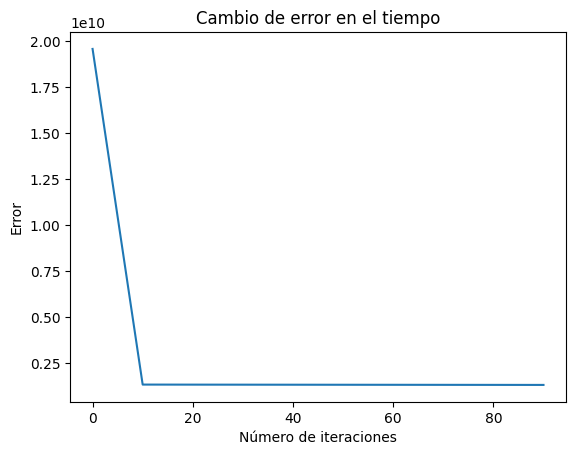

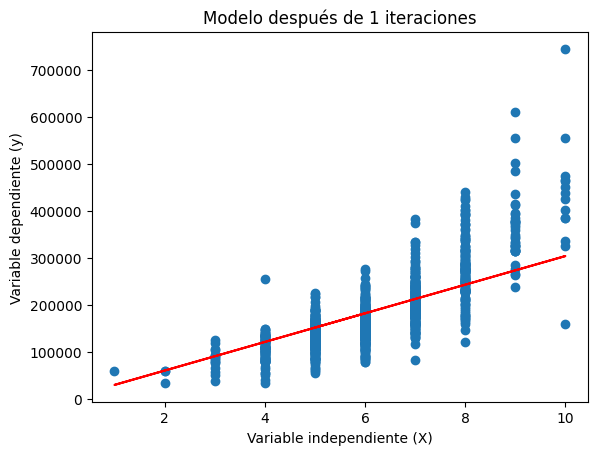

(array([182658.93096289, 152205.87240463, 182658.93096289, ...,
        152205.87240463, 213111.98952115, 152205.87240463]),
 array([182658.93096289, 152205.87240463, 182658.93096289, ...,
        152205.87240463, 213111.98952115, 152205.87240463]),
 array([182658.93096289, 152205.87240463, 182658.93096289, ...,
        152205.87240463, 213111.98952115, 152205.87240463]))

In [81]:
X = data_training[:,1]
y = data_training[:,0]

model = LinearRegression(epochs=100, imprimir_error_cada=10, alpha=0.01)
model.train(X, y)
model.predict(X)
model.plot_error()
model.plot_model(1)
model.predict_combined(model, X)

y = sale price 

x = First floor square feet 

Iteración: 0, Error: 19579630612.175514
Iteración: 10, Error: 6.807844691270117e+93
Iteración: 20, Error: 2.6316569712596184e+177
Iteración: 30, Error: 1.0172997076828507e+261
Iteración: 40, Error: inf
Iteración: 50, Error: inf
Iteración: 60, Error: inf
Iteración: 70, Error: inf
Iteración: 80, Error: 0.0
Iteración: 90, Error: 0.0


/var/folders/c0/gmnjtk656jx81ybjd3x7w3cm0000gn/T/ipykernel_16139/96633034.py:17: RuntimeWarning: overflow encountered in square
  error = np.nansum((y_pred - y)**2)/(2*n)
/var/folders/c0/gmnjtk656jx81ybjd3x7w3cm0000gn/T/ipykernel_16139/96633034.py:24: RuntimeWarning: invalid value encountered in subtract
  self.theta = self.theta - self.alpha*gradient


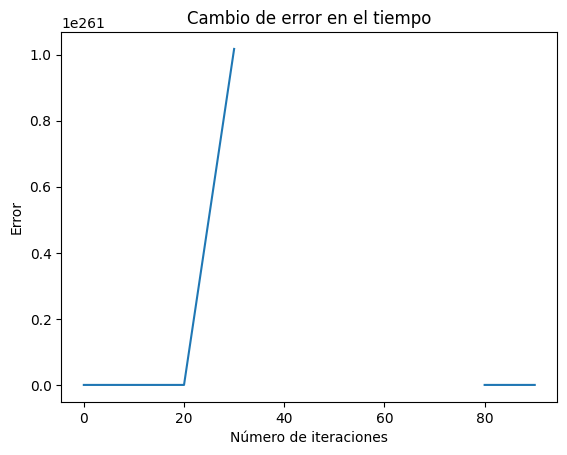

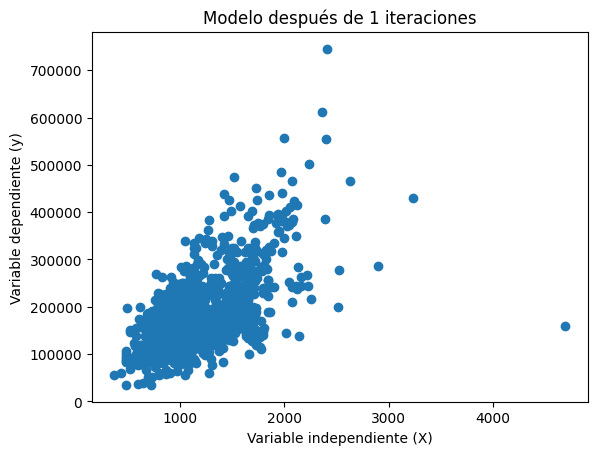

(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]))

In [82]:
X = data_training[:,2]
y = data_training[:,0]

model = LinearRegression(epochs=100, imprimir_error_cada=10, alpha=0.01)
model.train(X, y)
model.predict(X)
model.plot_error()
model.plot_model(1)
model.predict_combined(model, X)

y = sale price 

x = total rooms

Iteración: 0, Error: 19579630612.175514
Iteración: 10, Error: 2246597975.421609
Iteración: 20, Error: 2246482589.1610975
Iteración: 30, Error: 2246450512.943545
Iteración: 40, Error: 2246418789.277548
Iteración: 50, Error: 2246387413.8998537
Iteración: 60, Error: 2246356382.986669
Iteración: 70, Error: 2246325692.756182
Iteración: 80, Error: 2246295339.4680977
Iteración: 90, Error: 2246265319.423189


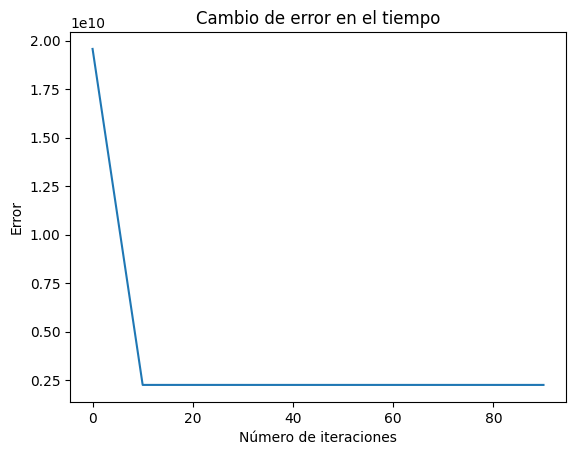

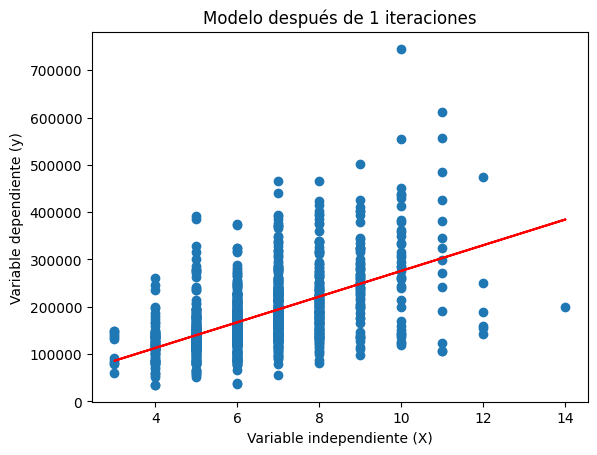

(array([167382.43843882, 221674.31578219, 140236.49976713, ...,
        275966.19312556, 221674.31578219, 167382.43843882]),
 array([167382.43843882, 221674.31578219, 140236.49976713, ...,
        275966.19312556, 221674.31578219, 167382.43843882]),
 array([167382.43843882, 221674.31578219, 140236.49976713, ...,
        275966.19312556, 221674.31578219, 167382.43843882]))

In [83]:
X = data_training[:,3]
y = data_training[:,0]

model = LinearRegression(epochs=100, imprimir_error_cada=10, alpha=0.01)
model.train(X, y)
model.predict(X)
model.plot_error()
model.plot_model(1)
model.predict_combined(model, X)

y = sale price 

x = construction date

Iteración: 0, Error: 19579630612.175514
Iteración: 10, Error: 1.0345311698637991e+102
Iteración: 20, Error: 6.443615541817607e+193
Iteración: 30, Error: 4.0134297022891966e+285
Iteración: 40, Error: inf
Iteración: 50, Error: inf
Iteración: 60, Error: inf
Iteración: 70, Error: 0.0
Iteración: 80, Error: 0.0
Iteración: 90, Error: 0.0


/var/folders/c0/gmnjtk656jx81ybjd3x7w3cm0000gn/T/ipykernel_16139/96633034.py:17: RuntimeWarning: overflow encountered in square
  error = np.nansum((y_pred - y)**2)/(2*n)
/var/folders/c0/gmnjtk656jx81ybjd3x7w3cm0000gn/T/ipykernel_16139/96633034.py:24: RuntimeWarning: invalid value encountered in subtract
  self.theta = self.theta - self.alpha*gradient


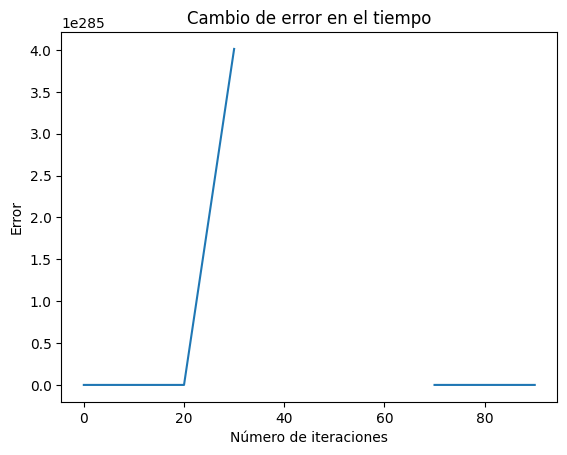

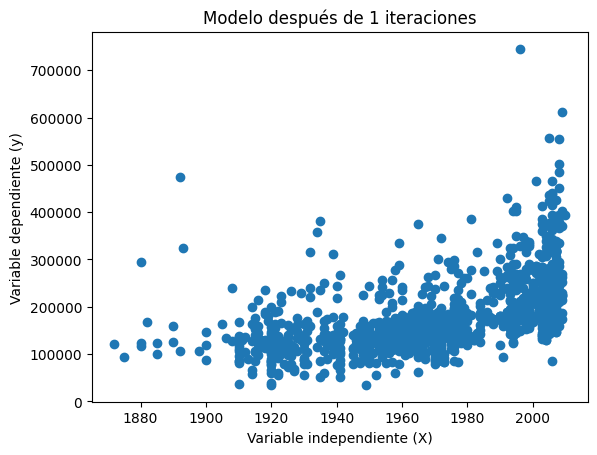

(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]))

In [84]:
X = data_training[:,4]
y = data_training[:,0]

model = LinearRegression(epochs=100, imprimir_error_cada=10, alpha=0.01)
model.train(X, y)
model.predict(X)
model.plot_error()
model.plot_model(1)
model.predict_combined(model, X)

y = sale price 

x = linear feet of street

Iteración: 0, Error: 16247576132.25214
Iteración: 10, Error: 0.0
Iteración: 20, Error: 0.0
Iteración: 30, Error: 0.0
Iteración: 40, Error: 0.0
Iteración: 50, Error: 0.0
Iteración: 60, Error: 0.0
Iteración: 70, Error: 0.0
Iteración: 80, Error: 0.0
Iteración: 90, Error: 0.0


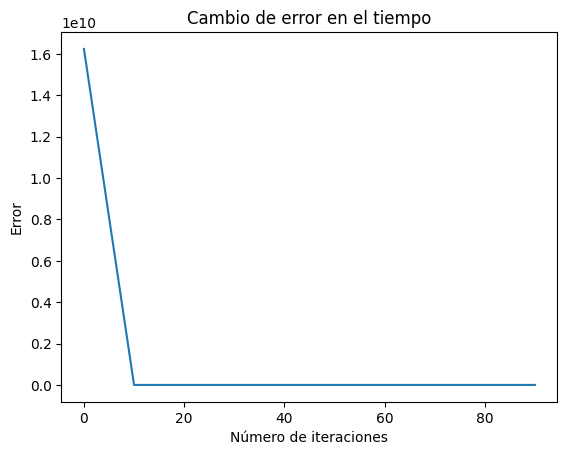

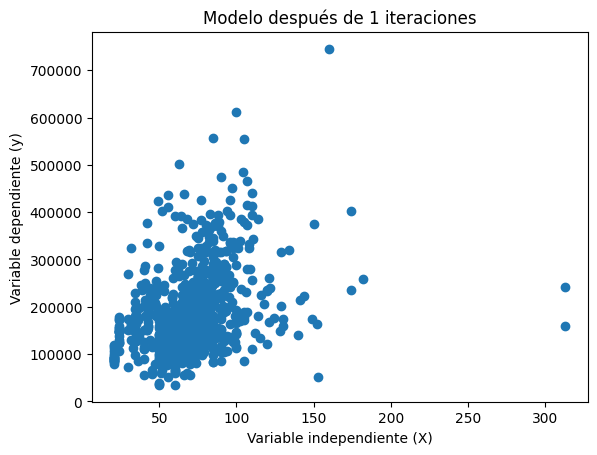

(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]))

In [85]:
X = data_training[:,5]
y = data_training[:,0]

model = LinearRegression(epochs=100, imprimir_error_cada=10, alpha=0.01)
model.train(X, y)
model.predict(X)
model.plot_error()
model.plot_model(1)
model.predict_combined(model, X)